In [1]:
import pandas as pd
import os
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, Dense, Add, AlphaDropout, concatenate
from keras.models import Model
from keras.layers import Flatten, GRU, Dropout, TimeDistributed, Activation, SimpleRNN, LSTM, Bidirectional
from keras.layers import Convolution1D, Convolution2D, MaxPooling2D, MaxPooling1D, ZeroPadding2D, AveragePooling2D
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from keras import optimizers
from sklearn.externals import joblib
from sklearn.utils import shuffle
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

Using TensorFlow backend.


In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12354013797238534225, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3526164480
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4428640544842486800
 physical_device_desc: "device: 0, name: TITAN V, pci bus id: 0000:01:00.0, compute capability: 7.0"]

In [3]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

def show_train_history_two(train_history1, train_history2, train, validation):  
    plt.plot(train_history1.history[train]+train_history2.history[train])  
    plt.plot(train_history1.history[validation]+train_history2.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

In [4]:
def load():
    print("load train_x")
    train_x = pd.read_csv("./train_x.csv")
    print("load train_y")
    train_y = pd.read_csv("./train_y.csv")
    
    
    print("load test_x")
    test_x = pd.read_csv("./x1.csv")
    print("load test_y")
    test_y = pd.read_csv("./y1.csv")
    
    print("loading completed")
    
    print("train_x to array")
    train_x = np.array(train_x, dtype = 'float64')
    print("train_y to array")
    train_y = np.array(train_y, dtype = 'float64')
    
    print("test_x to array")
    test_x = np.array(test_x, dtype = 'float64')
    print("test_y to array")
    test_y = np.array(test_y, dtype = 'float64')
    
    
    scaler = preprocessing.StandardScaler()
    #scaler = preprocessing.StandardScaler().fit(train_x)
    #scaler = preprocessing.MaxAbsScaler()
    #scaler = preprocessing.MinMaxScaler()
    print(scaler)
    
    '''train_x = scaler.fit_transform(train_x[:, np.newaxis])
    train_y = scaler.fit_transform(train_y[:, np.newaxis])
    test_x = scaler.fit_transform(test_x[:, np.newaxis])
    test_y = scaler.fit_transform(test_y[:, np.newaxis])'''
    #print("train_x", train_x)
    #print("train_x", train_x.shape)
    scaler.fit_transform(train_x)
    #train_x = preprocessing.scale(train_x, axis=0)
    #train_y = preprocessing.scale(train_y, axis=0)
    #test_x = preprocessing.scale(test_x, axis=0)
    #test_y = preprocessing.scale(test_y, axis=0)
    
    
    #train_x = scaler.transform(train_x)
    #train_y = scaler.transform(train_y)
    #test_x = scaler.transform(test_x)
    #test_y = scaler.transform(test_y)
    
    #train_x = preprocessing.normalize(train_x, norm='l1')
    #train_y = preprocessing.scale(train_y, axis=0)
    #test_x = preprocessing.normalize(test_x, norm='l1')
    #test_y = preprocessing.scale(test_y, axis=0)
    
    #(train_x, train_y) = shuffle(train_x, train_y)
    print("train_x", train_x)
    #(test_x, test_y) = shuffle(test_x, test_y)
    #joblib.dump(scaler,'scaler.pkl')
    
    return train_x, train_y, test_x, test_y , scaler

In [81]:
def model(train_x, train_y, test_x, test_y, MAX_SEQUENCE_LENGTH): 
    #scaler = joblib.load('scaler.pkl')
    sequence_input = Input(shape = (100,))
    #x1 = Convolution1D(200, 1, activation = 'relu')(sequence_input)
    #x1 = MaxPooling1D(pool_size=2, strides=None, padding='same')(x1)
    #x1 = Flatten()(x1)
    #x1 = GRU(100, return_sequences=False, dropout = 0.15, recurrent_dropout=0.2)(sequence_input)
    #merged = BatchNormalization()(x1)
    
    merged = Dense(500, activation="relu")(sequence_input)
    merged = Dropout(0.3)(merged)
    merged = BatchNormalization()(merged)
    for i in range(3):#500 , 3*2000
        merged = Dense(2000, activation="relu")(merged)
        merged = Dropout(0.3)(merged)
        merged = BatchNormalization()(merged)
    #merged = Dense(100, activation="relu")(merged)
    #merged = Dropout(0.3)(merged)
    #merged = BatchNormalization()(merged)
    #merged = Dense(100, activation="tanh")(merged)
    #merged = Dropout(0.4)(merged)
    #merged = BatchNormalization()(merged)
    #merged = Dense(200, activation="relu")(merged)
    #merged = Dropout(0.4)(merged)
    #merged = BatchNormalization()(merged)
    #merged = BatchNormalization()(merged)
    #merged = Dense(100, activation="relu")(merged)
    #merged = Flatten()(merged)
    preds = Dense(100, activation="linear")(merged)
    #preds = TimeDistributed(Dense(MAX_SEQUENCE_LENGTH, activation="linear"))(merged)
    model = Model(inputs=sequence_input, outputs=preds)
    
    
    #opt = optimizers.SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
    opt = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-06)
    
    
    model.compile(loss = 'mean_squared_error', optimizer = "adam", metrics = ['accuracy'])
    model.summary()
    callbacks1 = []
    callbacks1.append(EarlyStopping(monitor='loss', patience=64, verbose=1, min_delta=1e-3, mode='auto'))
    #callbacks1.append(ModelCheckpoint('./model/model-{epoch:05d}-{val_acc:.5f}-{val_loss:.5f}.h5', monitor='val_acc', save_best_only=True, mode = 'auto', period=1))
    callbacks2 = []
    #callbacks2.append(EarlyStopping(monitor='loss', patience=64, verbose=1, min_delta=1e-3, mode='auto'))
    #callbacks2.append(ModelCheckpoint('./model/model-{epoch:05d}-{val_acc:.5f}-{val_loss:.5f}.h5', monitor='val_acc', save_best_only=True, mode = 'auto', period=1))
    train_history1 = model.fit(train_x, train_y, batch_size = 200, epochs = 512, validation_split=0.3, verbose=1, callbacks=callbacks1)
    
    model.compile(loss = "mean_squared_error", optimizer = opt, metrics=['accuracy'])
    train_history2 = model.fit(train_x, train_y, validation_split=0.3, batch_size=200, epochs=512, verbose=1, callbacks=callbacks2)
    
    
    '''result = model.evaluate(train_x, train_y, batch_size=10000)
    print("train accuracy:", result[1])
    result = model.evaluate(test_x, test_y, batch_size=10000)
    print("test accuracy:", result[1])
    pred = 0.0
    pred += model.predict(test_x)
    pred = pd.DataFrame(pred)
    print(pred)'''
    #pred = scaler.inverse_transform(pred)
    #print(pred)
    # model.save("model.h5")
    # model.save("models/model.h5", monitor='val_acc', save_best_only=True, mode = 'auto', period=1)
    return  model ,train_history1, train_history2

In [ ]:
BATCH_START = 0
TIME_STEPS = 100
MAX_SEQUENCE_LENGTH =100

train_x, train_y, test_x, test_y ,scaler= load()
#print("train_x", train_x)
#print("train_x", train_x.shape)
#print("train_y", train_y)
#print("train_y", train_y.shape)
print("test_y", test_y)
print("test_y", test_y.shape)
#scaler = joblib.load('scaler.pkl')
#print(scaler.inverse_transform(train_x))
#(train_x, train_y) = shuffle(train_x, train_y)
#(test_x, test_y) = shuffle(test_x, test_y)

#train_x = np.expand_dims(train_x, axis=2) # for convolution
#test_x = np.expand_dims(test_x, axis=2) # for convolution
#train_y = np.expand_dims(train_y, axis=2) # for convolution
#test_y = np.expand_dims(test_y, axis=2) # for convolution
#print("train_x", train_x.shape)
#print("train_y", train_y.shape)

model , train_history1, train_history2 = model(train_x, train_y, test_x, test_y, MAX_SEQUENCE_LENGTH)
#train_history = model(train_x, train_y)

load train_x
load train_y
load test_x
load test_y
loading completed
train_x to array
train_y to array
test_x to array
test_y to array
StandardScaler(copy=True, with_mean=True, with_std=True)
train_x [[-0.         -0.02277362 -0.04552479 ... -0.06823106 -0.04552479
  -0.02277362]
 [ 0.          0.00080936  0.00161792 ...  0.00242488  0.00161792
   0.00080936]
 [-0.         -0.00286562 -0.00572841 ... -0.00858555 -0.00572841
  -0.00286562]
 ...
 [ 0.          0.01025985  0.02050957 ...  0.03073906  0.02050957
   0.01025985]
 [-0.         -0.00187459 -0.00374734 ... -0.00561638 -0.00374734
  -0.00187459]
 [ 0.          0.00368934  0.00737503 ...  0.01105345  0.00737503
   0.00368934]]
test_y [[0.         0.03134882 0.0626667  ... 0.09392273 0.0626667  0.03134882]
 [0.         0.03131789 0.06260488 ... 0.09383008 0.06260488 0.03131789]
 [0.         0.031287   0.06254312 ... 0.09373752 0.06254312 0.031287  ]
 ...
 [0.         0.00060791 0.00121522 ... 0.00182133 0.00121522 0.00060791]
 [0. 

16790/16790 [==============================] - 1s 53us/step - loss: 0.0112 - acc: 0.4136 - val_loss: 0.0034 - val_acc: 0.4687
Epoch 36/512
16790/16790 [==============================] - 1s 53us/step - loss: 0.0061 - acc: 0.5122 - val_loss: 0.0029 - val_acc: 0.4956
Epoch 37/512
16790/16790 [==============================] - 1s 53us/step - loss: 0.0075 - acc: 0.4916 - val_loss: 0.0145 - val_acc: 0.4823
Epoch 38/512
16790/16790 [==============================] - 1s 53us/step - loss: 0.0074 - acc: 0.4549 - val_loss: 0.0028 - val_acc: 0.4100
Epoch 39/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0065 - acc: 0.4699 - val_loss: 0.0083 - val_acc: 0.4570
Epoch 40/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0075 - acc: 0.4398 - val_loss: 0.0045 - val_acc: 0.7089
Epoch 41/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0060 - acc: 0.4818 - val_loss: 0.0032 - val_acc: 0.6094
Epoch 42/512
16790/16790 [==============

16790/16790 [==============================] - 1s 52us/step - loss: 0.0041 - acc: 0.6448 - val_loss: 0.0014 - val_acc: 0.4698
Epoch 95/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0040 - acc: 0.6527 - val_loss: 9.4887e-04 - val_acc: 0.6977
Epoch 96/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0038 - acc: 0.7071 - val_loss: 0.0021 - val_acc: 0.7641
Epoch 97/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0037 - acc: 0.6714 - val_loss: 0.0021 - val_acc: 0.6403
Epoch 98/512
16790/16790 [==============================] - 1s 53us/step - loss: 0.0042 - acc: 0.6727 - val_loss: 0.0013 - val_acc: 0.8341
Epoch 99/512
16790/16790 [==============================] - 1s 54us/step - loss: 0.0042 - acc: 0.7134 - val_loss: 0.0031 - val_acc: 0.8762
Epoch 100/512
16790/16790 [==============================] - 1s 54us/step - loss: 0.0045 - acc: 0.6971 - val_loss: 0.0019 - val_acc: 0.6965
Epoch 101/512
16790/16790 [========

16790/16790 [==============================] - 1s 52us/step - loss: 0.0030 - acc: 0.8800 - val_loss: 6.7016e-04 - val_acc: 1.0000
Epoch 153/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0030 - acc: 0.8601 - val_loss: 0.0020 - val_acc: 0.8520
Epoch 154/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0027 - acc: 0.8833 - val_loss: 9.8584e-04 - val_acc: 1.0000
Epoch 155/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0028 - acc: 0.8697 - val_loss: 0.0017 - val_acc: 0.6820
Epoch 156/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0025 - acc: 0.8757 - val_loss: 0.0013 - val_acc: 0.9899
Epoch 157/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0028 - acc: 0.8699 - val_loss: 0.0013 - val_acc: 0.9667
Epoch 158/512
16790/16790 [==============================] - 1s 52us/step - loss: 0.0025 - acc: 0.8785 - val_loss: 7.0788e-04 - val_acc: 1.0000
Epoch 159/512
16790/16

16790/16790 [==============================] - 1s 49us/step - loss: 0.0015 - acc: 0.9272 - val_loss: 8.2675e-04 - val_acc: 1.0000
Epoch 29/512
16790/16790 [==============================] - 1s 49us/step - loss: 0.0016 - acc: 0.9155 - val_loss: 7.1356e-04 - val_acc: 1.0000
Epoch 30/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0016 - acc: 0.9214 - val_loss: 8.2557e-04 - val_acc: 1.0000
Epoch 31/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0016 - acc: 0.9219 - val_loss: 6.6795e-04 - val_acc: 1.0000
Epoch 32/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0015 - acc: 0.9242 - val_loss: 6.1540e-04 - val_acc: 1.0000
Epoch 33/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0015 - acc: 0.9295 - val_loss: 7.7852e-04 - val_acc: 1.0000
Epoch 34/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9266 - val_loss: 7.7054e-04 - val_acc: 1.0000
Epoch 35/512

16790/16790 [==============================] - 1s 48us/step - loss: 0.0015 - acc: 0.9241 - val_loss: 7.6514e-04 - val_acc: 1.0000
Epoch 86/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9252 - val_loss: 8.2608e-04 - val_acc: 1.0000
Epoch 87/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9290 - val_loss: 8.8413e-04 - val_acc: 1.0000
Epoch 88/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0012 - acc: 0.9317 - val_loss: 6.1620e-04 - val_acc: 1.0000
Epoch 89/512
16790/16790 [==============================] - 1s 49us/step - loss: 0.0014 - acc: 0.9161 - val_loss: 7.7499e-04 - val_acc: 1.0000
Epoch 90/512
16790/16790 [==============================] - 1s 49us/step - loss: 0.0014 - acc: 0.9253 - val_loss: 7.3399e-04 - val_acc: 1.0000
Epoch 91/512
16790/16790 [==============================] - 1s 49us/step - loss: 0.0013 - acc: 0.9219 - val_loss: 9.6854e-04 - val_acc: 1.0000
Epoch 92/512

16790/16790 [==============================] - 1s 49us/step - loss: 0.0014 - acc: 0.9230 - val_loss: 8.9126e-04 - val_acc: 1.0000
Epoch 143/512
16790/16790 [==============================] - 1s 49us/step - loss: 0.0013 - acc: 0.9249 - val_loss: 7.2524e-04 - val_acc: 1.0000
Epoch 144/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9217 - val_loss: 6.8968e-04 - val_acc: 0.9989
Epoch 145/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9219 - val_loss: 8.0056e-04 - val_acc: 1.0000
Epoch 146/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9328 - val_loss: 6.6392e-04 - val_acc: 1.0000
Epoch 147/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0014 - acc: 0.9143 - val_loss: 6.1823e-04 - val_acc: 1.0000
Epoch 148/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9335 - val_loss: 7.2107e-04 - val_acc: 1.0000
Epoch 

Epoch 199/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9170 - val_loss: 6.5801e-04 - val_acc: 0.9947
Epoch 200/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9306 - val_loss: 7.6720e-04 - val_acc: 1.0000
Epoch 201/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9228 - val_loss: 6.7449e-04 - val_acc: 1.0000
Epoch 202/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9328 - val_loss: 8.1860e-04 - val_acc: 0.9881
Epoch 203/512
16790/16790 [==============================] - 1s 49us/step - loss: 0.0012 - acc: 0.9291 - val_loss: 7.4237e-04 - val_acc: 0.9814
Epoch 204/512
16790/16790 [==============================] - 1s 49us/step - loss: 0.0011 - acc: 0.9305 - val_loss: 9.4249e-04 - val_acc: 1.0000
Epoch 205/512
16790/16790 [==============================] - 1s 49us/step - loss: 0.0012 - acc: 0.9216 - val_loss: 7.7396e-04 - val_acc:

16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9237 - val_loss: 5.7063e-04 - val_acc: 1.0000
Epoch 257/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0012 - acc: 0.9264 - val_loss: 6.4243e-04 - val_acc: 1.0000
Epoch 258/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0012 - acc: 0.9266 - val_loss: 9.7138e-04 - val_acc: 1.0000
Epoch 259/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0011 - acc: 0.9292 - val_loss: 0.0011 - val_acc: 0.9717
Epoch 260/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0012 - acc: 0.9254 - val_loss: 5.3073e-04 - val_acc: 1.0000
Epoch 261/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0012 - acc: 0.9322 - val_loss: 7.9818e-04 - val_acc: 1.0000
Epoch 262/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9248 - val_loss: 7.0128e-04 - val_acc: 1.0000
Epoch 263/

16790/16790 [==============================] - 1s 48us/step - loss: 0.0012 - acc: 0.9223 - val_loss: 7.2454e-04 - val_acc: 1.0000
Epoch 314/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0012 - acc: 0.9237 - val_loss: 5.9601e-04 - val_acc: 0.9801
Epoch 315/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0011 - acc: 0.9272 - val_loss: 6.2821e-04 - val_acc: 1.0000
Epoch 316/512
16790/16790 [==============================] - 1s 47us/step - loss: 9.4698e-04 - acc: 0.9320 - val_loss: 6.8052e-04 - val_acc: 1.0000
Epoch 317/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0011 - acc: 0.9260 - val_loss: 7.0928e-04 - val_acc: 1.0000
Epoch 318/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0010 - acc: 0.9330 - val_loss: 6.7456e-04 - val_acc: 1.0000
Epoch 319/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0012 - acc: 0.9202 - val_loss: 9.4521e-04 - val_acc: 1.0000
Ep

Epoch 370/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9234 - val_loss: 6.4387e-04 - val_acc: 0.9818
Epoch 371/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9284 - val_loss: 5.9840e-04 - val_acc: 0.9804
Epoch 372/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9255 - val_loss: 9.2410e-04 - val_acc: 1.0000
Epoch 373/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9275 - val_loss: 9.0584e-04 - val_acc: 1.0000
Epoch 374/512
16790/16790 [==============================] - 1s 49us/step - loss: 0.0012 - acc: 0.9221 - val_loss: 8.0286e-04 - val_acc: 1.0000
Epoch 375/512
16790/16790 [==============================] - 1s 50us/step - loss: 0.0010 - acc: 0.9255 - val_loss: 8.1515e-04 - val_acc: 0.9697
Epoch 376/512
16790/16790 [==============================] - 1s 50us/step - loss: 0.0012 - acc: 0.9163 - val_loss: 0.0010 - val_acc: 1.0

Epoch 427/512
16790/16790 [==============================] - 1s 48us/step - loss: 9.9186e-04 - acc: 0.9324 - val_loss: 6.4977e-04 - val_acc: 1.0000
Epoch 428/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0011 - acc: 0.9325 - val_loss: 6.2535e-04 - val_acc: 1.0000
Epoch 429/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0010 - acc: 0.9269 - val_loss: 6.8191e-04 - val_acc: 1.0000
Epoch 430/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0010 - acc: 0.9290 - val_loss: 8.0686e-04 - val_acc: 1.0000
Epoch 431/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0012 - acc: 0.9264 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 432/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0012 - acc: 0.9216 - val_loss: 8.6538e-04 - val_acc: 0.9322
Epoch 433/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9188 - val_loss: 6.9358e-04 - val_acc:

Epoch 484/512
16790/16790 [==============================] - 1s 48us/step - loss: 9.6307e-04 - acc: 0.9288 - val_loss: 6.8803e-04 - val_acc: 0.9797
Epoch 485/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0010 - acc: 0.9281 - val_loss: 9.2670e-04 - val_acc: 1.0000
Epoch 486/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0013 - acc: 0.9233 - val_loss: 8.6885e-04 - val_acc: 1.0000
Epoch 487/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0012 - acc: 0.9239 - val_loss: 7.2364e-04 - val_acc: 1.0000
Epoch 488/512
16790/16790 [==============================] - 1s 47us/step - loss: 0.0014 - acc: 0.9208 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 489/512
16790/16790 [==============================] - 1s 47us/step - loss: 9.7752e-04 - acc: 0.9298 - val_loss: 7.1877e-04 - val_acc: 0.9899
Epoch 490/512
16790/16790 [==============================] - 1s 48us/step - loss: 0.0012 - acc: 0.9255 - val_loss: 7.0965e-04 - val_

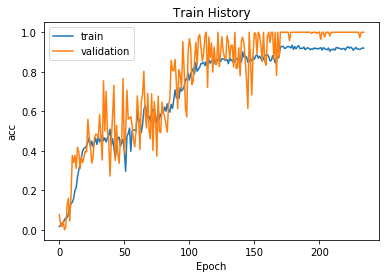

In [65]:
#show_train_history(train_history, 'acc', 'val_acc') 
show_train_history_two(train_history1, train_history2, 'acc', 'val_acc')  

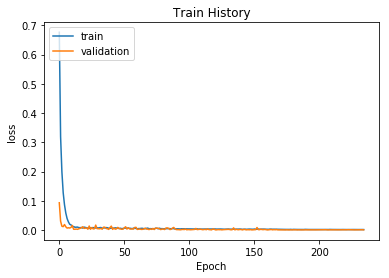

In [66]:
#show_train_history(train_history, 'loss', 'val_loss') 
show_train_history_two(train_history1, train_history2, 'loss', 'val_loss')  

In [67]:
print(test_y)

[[0.         0.03134882 0.0626667  ... 0.09392273 0.0626667  0.03134882]
 [0.         0.03131789 0.06260488 ... 0.09383008 0.06260488 0.03131789]
 [0.         0.031287   0.06254312 ... 0.09373752 0.06254312 0.031287  ]
 ...
 [0.         0.00060791 0.00121522 ... 0.00182133 0.00121522 0.00060791]
 [0.         0.00060731 0.00121402 ... 0.00181953 0.00121402 0.00060731]
 [0.         0.00060671 0.00121282 ... 0.00181774 0.00121282 0.00060671]]


In [68]:
#model.save('pde.h5')
result = model.evaluate(train_x, train_y, batch_size=1000)
print("train accuracy:", result[1])
result = model.evaluate(test_x, test_y, batch_size=1000)
print("test accuracy:", result[1])
pred = 0.0
pred += model.predict(test_x)
pred = pd.DataFrame(pred)
print(pred)
#pred = scaler.inverse_transform(pred)

23987/23987 [==============================] - 0s 6us/step
train accuracy: 1.0
3998/3998 [==============================] - 0s 5us/step
test accuracy: 1.0
            0         1         2         3         4         5         6   \
0     0.004075  0.030809  0.055181  0.081992  0.110250  0.138759  0.167045   
1     0.004071  0.030777  0.055124  0.081906  0.110135  0.138613  0.166870   
2     0.004067  0.030744  0.055065  0.081819  0.110018  0.138465  0.166691   
3     0.004063  0.030710  0.055006  0.081732  0.109901  0.138317  0.166513   
4     0.004058  0.030678  0.054948  0.081646  0.109784  0.138171  0.166336   
5     0.004054  0.030645  0.054890  0.081560  0.109668  0.138024  0.166159   
6     0.004050  0.030612  0.054832  0.081474  0.109552  0.137878  0.165983   
7     0.004046  0.030579  0.054774  0.081387  0.109436  0.137732  0.165806   
8     0.004041  0.030546  0.054716  0.081300  0.109319  0.137584  0.165628   
9     0.004037  0.030513  0.054657  0.081214  0.109203  0.137437 

In [78]:
tmp = np.zeros((1,len(test_x[0])))
for i in range(len(test_x[0])):
    tmp[0][i] = test_x[0][i]
Z=tmp
for i in range(40):
    test = model.predict(tmp)
    Z = np.append(Z,test,axis=0)
    tmp=test

In [79]:
#Z = scaler.inverse_transform(Z)
print(Z.shape)

(41, 100)


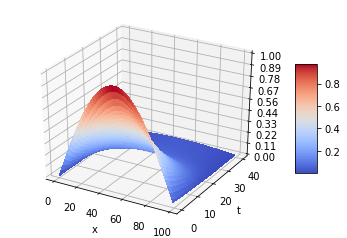

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.gca(projection='3d')
Y1=np.arange(41)
X=np.arange(100)
X, Y1 = np.meshgrid(X, Y1)
# Plot the surface.
#pr = model.predict(test_x)
surf = ax.plot_surface(X, Y1, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1, 1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.xlabel('x')
plt.ylabel('t')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()